In [1]:
# A bit of setup
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.style.use('default')
plt.rcParams["xtick.labelsize"]=12 
plt.rcParams["ytick.labelsize"]=12
plt.rcParams["legend.fontsize"]=10
plt.rcParams["axes.labelsize"]=14
plt.rcParams['font.size']=16
# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']

np.random.seed(1789)

# Linear Regression

This notebook we'll investigate the two main frameworks for probabilistic inference: the frequentist and the Bayesian approach. In order to do this we will use one of the simplest machine learning models, which is linear regression. This will allow us to investigate in detail what is going on, especially from a Bayesian point of view. In fact, with only a few assumptions we'll be able to obtain analytical solutions and perform full Bayesian inference.




##Problem definition
Given a training data set of N observations of D-dimensional vectors $\mathbf{X} = \{\textbf{x}_1, ..., \textbf{x}_N\}$ and their corresponding target values $\mathbf{t} = \{t_1, ..., t_N\}$, the goal of linear regression is to learn the appropriate function $y(\mathbf{x})$ that, given a new input $\textbf{x}$, can predict the correct value $t$. 

Linear regression models share the property of being linear functions of the model parameters. This linearity gives them simple analytical properties (we'll see later how the linear problem can be solved analytically). 

A general linear regression model can be expressed in terms of a linear combination of basis functions $\phi_i(\mathbf{x})$
$$y(\mathbf{x},\mathbf{w}) = w_0 + \sum_{i=1}^{M-1} \phi_i(\mathbf{x_i})w_i. $$

Where $M-1$ is the total number of parameters in the model. In the simplest linear model the basis function is the identity so that we have linearity also in the input variables 

$$y(\mathbf{x},\mathbf{w}) = w_0 + w_1 \mathbf{x}_1 + ... w_{M-1} \mathbf{x}_{M-1}. $$

If we use the convention to define the "dummy" basis fucntion $\phi_0(\mathbf{x}) = 1$, the bias term can be included in the weight vector
$$y(\mathbf{x},\mathbf{w}) = \sum_{i=0}^{M-1} \phi_i(\mathbf{x_i})w_i = \mathbf{w}^T \mathbf{\Phi}(\mathbf{x}), $$

where $\mathbf{\Phi}$ is the *design matrix*, containing a different example in each row, and a different feature in each column

\begin{pmatrix}
\phi_0(\mathbf{x}_1) & \phi_2(\mathbf{x}_1) & \dots & \phi_{M-1}(\mathbf{x}_1)\\
\phi_0(\mathbf{x}_2) & \phi_2(\mathbf{x}_2) & \dots & \phi_{M-1}(\mathbf{x}_2)\\
\vdots & \vdots & \ddots & \vdots \\
\phi_0(\mathbf{x}_3) & \phi_2(\mathbf{x}_3) & \dots & \phi_{M-1}(\mathbf{x}_N)\\
\end{pmatrix}

 
To express the inherent aleatoric uncertainty associated to a random variable, we generally assume the target variable $t$ to be given by a deterministic function $y(\mathbf{x},\mathbf{w})$ with additive Gaussian noise 
$$t = y(\mathbf{x},\mathbf{w}) + \epsilon, \ \ \ \epsilon \in \mathcal{N}(0, \beta^{-1}).$$

Here $\beta$ is the precision, or inverse variance. 

From a probabilistic perspective, we aim to model 
$$p(t | \mathbf{x}, \mathbf{w}, \beta) = \mathcal{N}(t|y( \mathbf{x}, \mathbf{w}), \beta^{-1}).$$

The linearity is retained in the relation between the mean value $y( \mathbf{x}, \mathbf{w})$ and the model parameters. 

In a standard probabilistic inference problem, given $N$ i.i.d observations $\mathbf{X}$ and corresponding targets $\mathbf{t}$, which we model to be sampled from the conditional distribution $p(t | \mathbf{x}, \mathbf{w}, \beta)$, the goal is to predict the values of the model parameters $\mathbf{w}$ and $\beta$.


#Frequentist Linear Regression 

## Maximum likelihood estimation
The most common method of parameter estimation in frequentist inference is Maximum Likelihood Estimation (MLE). 

Given our $N$ i.i.d observations $\mathbf{X}$ and corresponding targets $\mathbf{t}$, the conditional likelihood - the joint conditional probability of $\mathbf{t}$ given $\mathbf{X}$, parametrized by $\mathbf{w}$ and $\beta$ - is
$$p(\mathbf{t} | \mathbf{X}, \mathbf{w}, \beta) = \prod_{n=1}^{N} \mathcal{N}(t_n | \mathbf{w}^T \mathbf{\phi}(\mathbf{x}_n), \beta^{-1}).$$

And the log-likelihood is given by 
$$\text{log} p(\mathbf{t} | \mathbf{X}, \mathbf{w}, \beta) = \sum_{n=1}^{N} \text{log} \mathcal{N}(t_n | \mathbf{w}^T \mathbf{\phi}(\mathbf{x}_n), \beta^{-1}) \\
= \frac{N}{2} \text{log}\beta - \frac{N}{2} \text{log}(2\pi) - \frac{\beta}{2}\sum_{n=1}^{N}[t_n- \mathbf{w}^T \mathbf{\phi}(\mathbf{x}_n)]^2.$$

The optimal parameters $\mathbf{w}$ and $\beta$ are obtained by maximizing the log-likelihood. We first optimize with respect to $\mathbf{w}$. Note that the only term depending on $\mathbf{w}$ is the last one, which is proportional to the negative of the mean squared error (MSE). Hence, maximizing the likelihood w.r.t. $\mathbf{w}$ is equivalent to minimizing the MSE under the assumption of a Gaussian noise distribution for the linear model. 

The result of this optimization problem w.r.t. $\mathbf{w}$ is known as the *normal equations*: 
$$ \mathbf{w}_{ML} = (\mathbf{\Phi}^T \mathbf{\Phi})^{-1} \mathbf{\Phi}^T \mathbf{t}. $$

Using our point estimate for the weight parameter $\mathbf{w}=\mathbf{w}_{ML}$ we can now make point estimate predictions on a new value $\mathbf{x^*}$

$$y(\mathbf{x^*},\mathbf{w}_{ML}) = \mathbf{w}_{ML}\phi(\mathbf{x^*})$$

We can also build a probabilistic model to get a distribution over $t$, rather than a single point estimate $y_{ML}$. Fixing $\mathbf{w}=\mathbf{w}_{ML}$, we maximize the likelihood w.r.t. the precision parameter. It can be shown that the result is given by  

$$\frac{1}{\beta_{ML}} = \frac{1}{N} \sum_{n=1}^{N} [y(x_n, \mathbf{w}_{ML}) -t_n]^2.$$

The predictive distribution for a new value $\mathbf{x^*}$ is then

$$p(t|\mathbf{x^*}, \mathbf{w}_{ML}, \beta_{ML}) = \mathcal{N} (t|y(\mathbf{x^*}, \mathbf{w}_{ML}), \beta_{ML}^{-1})$$

Note that the variance of this distribution is independent of the input data. This means that it's not affected by how much training data we might or might not have in a given region of phase space. This variance represents the irreducible aleatoric uncertainty inherent in the dataset and is fixed for all values of $\mathbf{x}$. 


## Solving linear regression with MLE

In the following cells we'll put into practice what we just reviewed.

We'll first define some useful basis functions $\Phi(\mathbf{X})$, which will come in handy for the rest of the notebook. 

The identity basis function can be used to fit a straight line, the Gaussian and polynomial basis functions allow to fit non linear data. The expand() function outputs the design matrix by applying the basis function and adding a "dummy" column of ones to X to represent the bias term. 

In [2]:
# define some basis functions 
def identity_basis_function(x):
    return x

def gaussian_basis_function(x, mu, sigma=0.1):
    return np.exp(-0.5 * (x - mu) ** 2 / sigma ** 2)

def polynomial_basis_function(x, power):
    return x ** power


def expand(x, bf, bf_args=None):
    ''' Returns design matrix'''
    if bf_args is None:
        return np.concatenate([np.ones(x.shape), bf(x)], axis=1)
    else:
        return np.concatenate([np.ones(x.shape)] + [bf(x, bf_arg) for bf_arg in bf_args], axis=1)

We'll also define some data generating functions to model a straight line and a sinusoidal function, adding some Gaussian noise to the true mean value. These will generate the data we'll try to fit.

In [3]:
# define some data generating functions 
f_w0 = -0.3
f_w1 =  0.5

def f(X, noise_variance):
    '''Linear function plus noise'''
    return f_w0 + f_w1 * X + noise(X.shape, noise_variance)


def g(X, noise_variance):
    '''Sinusoidial function plus noise'''
    return 0.5 + np.sin(2 * np.pi * X) + noise(X.shape, noise_variance)


def noise(size, variance):
    return np.random.normal(scale=np.sqrt(variance), size=size)


Some plotting utils...

In [4]:
# plotting utils (1)

def plot_data(x, t, legend=None):
    plt.scatter(x, t, marker='o', c="k", s=20, label='Training data')

def plot_true_mean(x, y, label='True mean'):
    plt.plot(x, y, 'k--', label=label)

def plot_predictive(x, y, std, y_label='Prediction', std_label='Uncertainty', plot_xy_labels=True):
    y = y.ravel()
    std = std.ravel()

    plt.plot(x, y, label=y_label)
    plt.fill_between(x.ravel(), y + std, y - std, alpha = 0.5, label=std_label)

    if plot_xy_labels:
        plt.xlabel('x')
        plt.ylabel('y')

Lastly, let's define the formulas to solve our maximum likelihood inference problem. The first two functions are just the two equations for the weight vector and the variance estimators that we defined above. The last function uses our weight vector ML estimator to predict the target values $\mathbf{y}$ given $\mathbf{\Phi}(\mathbf{X})$.



In [5]:
# functions for Maximum Likelihood Estimation 
from numpy.linalg import inv
from sklearn.metrics import mean_squared_error

def solve_normal_equation(Phi, t):
  w = inv(Phi.T.dot(Phi)).dot(Phi.T).dot(t)
  return w

def predict_y_ml(Phi, w_ml):
  '''compute Y = W.T * Phi(X) '''
  y_ml = np.matmul(w_ml.T, Phi.T) #Phi has originally dimensions flipped
  return np.array(y_ml).transpose() #go back to flipped dimensions to match t.shape

def solve_variance_ml(Phi, t, w_ml):
  y_ml = predict_y_ml(Phi, w_ml)
  y_var_ml = mean_squared_error(y_ml, t)
  return y_var_ml

Now we're ready to solve our linear regression problem. Let's start from straight line fitting. 

### Straight line fitting 
For straight line fitting we use the linear regression model $y(x, \mathbf{w}) = w_0 + w_1 x$. To generate data for this model we can use the function $f$ that we defined above. 

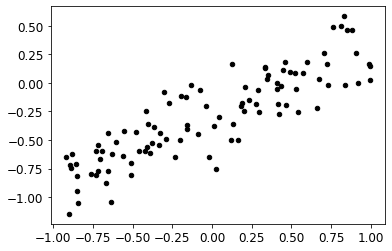

In [6]:
### Create some data with a straight line model f ###

# number of training data points
N = 100

# training observations in [-1, 1)
X = np.random.rand(N, 1) * 2 - 1

# training target values
beta = 25.0 # precision of true distribution
t = f(X, noise_variance=1/beta)

# design matrix of train observations
Phi_train = expand(X, identity_basis_function)

#plot training data
plot_data(X,t)


In [7]:
### Solve inference problem with ML ###

w_ml = solve_normal_equation(Phi_train,t)
print("b = ",w_ml[0],", m = ", w_ml[1])
var_ml = solve_variance_ml(Phi_train, t, w_ml)
print("variance = %.5f" %var_ml)
beta_ml = 1/var_ml 
print("beta = %.5f" % beta_ml) 

b =  [-0.28083978] , m =  [0.58480734]
variance = 0.03581
beta = 27.92645


In [8]:
# Check result with sklearn
from sklearn.linear_model import LinearRegression
model = LinearRegression()
w_skl = model.fit(X.reshape((len(X),1)), t) 
print("b = %.5f,  m = %.5f" % (w_skl.intercept_,w_skl.coef_[0]))

b = -0.28084,  m = 0.58481


Now let's use our ML estimates to get new predictions y on new test data. Let's increase the range of x values over which we test our model to see how the model performs in regions of phase space it wasn't trained on. 

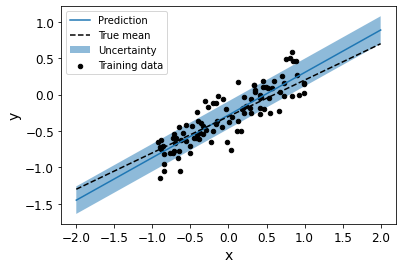

In [9]:
### Testing ###
# test observations
X_test = np.linspace(-2, 2, 100).reshape(-1, 1)

# function values without noise 
y_test_true_mean = f(X_test, noise_variance=0)
    
# design matrix of test observations
Phi_test = expand(X_test, identity_basis_function)

# predictions on test data
y_test = predict_y_ml(Phi_test, w_ml)

# plot predictive distribution 
plot_predictive(X_test,y_test,np.sqrt(var_ml))
plot_data(X,t) #training data
plot_true_mean(X_test, y_test_true_mean) 
plt.legend()

Note how in regions of unknown phase space the model tries to extrapolate and reports its predictions with the same uncertainty as in regions where it had a lot of training data.

### Sinusoidal dataset fitting
Now let's try to fit a sinusoidal distribution of our data points. In order to fit a non-linear function we need to include some non-linearity in our model. To do this we use the polynomial basis functions. Note that we choose a polynomial of degree 200, so that our model complexity greatly exceeds the complexity of the underlying true distribution we are trying to fit. What do you expect?

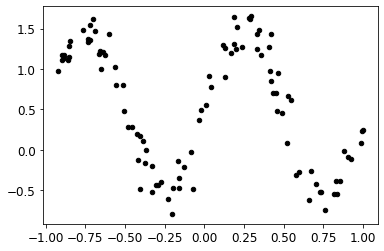

In [10]:
### Create some data with sinusoidal model g ###

# we use the same X and X_test data generated before 

# training target values
beta = 25.0 
t = g(X, noise_variance=1/beta)

# design matrix of train observations
poly_deg = 200
Phi_train = expand(X, polynomial_basis_function,bf_args=range(1,poly_deg)) 

#Gaussian mixture model with 9 Gaussians
#Phi_train = expand(X, gaussian_basis_function,bf_args=np.linspace(0, 1, 9)) 
    
plot_data(X, t)

In [11]:
### Solve inference problem with ML ###

w_ml = solve_normal_equation(Phi_train,t)
print(w_ml.shape)
var_ml = solve_variance_ml(Phi_train, t, w_ml)
print("variance = ",var_ml)
beta_ml = 1/var_ml 
print("beta = ",beta_ml) 

(200, 1)
variance =  4.712516204270466
beta =  0.2122008618439982


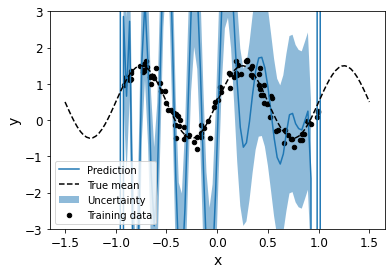

In [12]:
### Testing ###
# test observations
X_test = np.linspace(-1.5, 1.5, 100).reshape(-1, 1)

# function values without noise 
y_test_true_mean = g(X_test, noise_variance=0)

# design matrix of test observations
Phi_test = expand(X_test, polynomial_basis_function,bf_args=range(1,poly_deg))
#Phi_test = expand(X_test, gaussian_basis_function,bf_args=np.linspace(0, 1, 9))

# predictions on test data
y_test = predict_y_ml(Phi_test, w_ml)

# plot predictive distribution 
plot_predictive(X_test,y_test,np.sqrt(var_ml))
plot_data(X,t) #training data
plot_true_mean(X_test, y_test_true_mean) #true mean
plt.ylim(-3,3)
plt.legend()

We see that when the model complexity exceeds the complexity of the true data generating function, MLE is prone to severe overfitting. 

Now let's fit the model with a more reasonable choice of polynomial and look at how the performance of the model varies with the size of the training dataset.


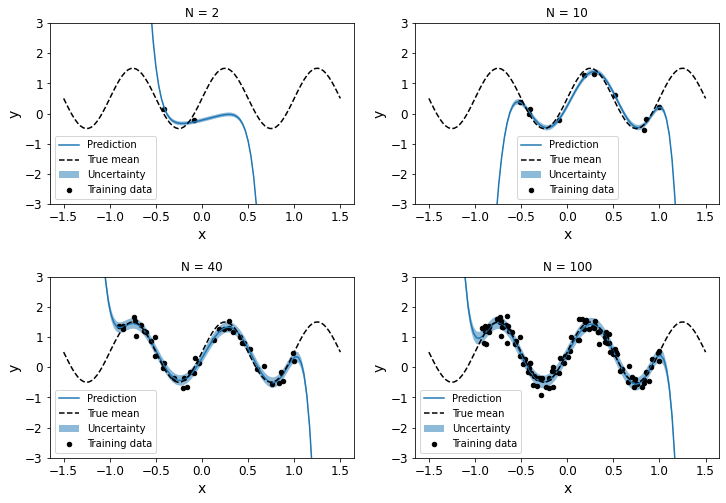

In [13]:

N_list = [2, 10, 40, 100]

t = g(X, noise_variance=1/beta)
poly_deg = 8
Phi_train = expand(X, polynomial_basis_function,bf_args=range(1,poly_deg)) 

X_test = np.linspace(-1.5, 1.5, 100).reshape(-1, 1)
plt.figure(figsize=(12, 8))
plt.subplots_adjust(hspace=0.4)

for i, N in enumerate(N_list):
  X_N = X[:N]
  t_N = t[:N]
  Phi_N = Phi_train[:N]

  # ML estimators 
  w_ml = solve_normal_equation(Phi_N,t_N)
  var_ml = solve_variance_ml(Phi_N, t_N, w_ml)

  # function values without noise 
  #y_test_true_mean = f(X_test, noise_variance=0)
  y_test_true_mean = g(X_test, noise_variance=0) 
  # design matrix of test observations
  #Phi_test = expand(X_test, identity_basis_function)
  Phi_test = expand(X_test, polynomial_basis_function,bf_args=range(1,poly_deg))

  # predictions on test data
  y_test = predict_y_ml(Phi_test, w_ml)

  # plot predictive distribution 
  plt.subplot(2,2, i+1)
  plot_predictive(X_test,y_test,np.sqrt(var_ml))
  plot_data(X_N,t_N) #training data
  plot_true_mean(X_test, y_test_true_mean) #true mean
  plt.title(f'N = {N}')
  plt.ylim(-3,3)
  plt.legend()

### Pitfalls of frequentist inference

In the previous cells we have seen the two major pitfalls of MLE: 
* When the size of the training data set is too small, or when the complexity of the model chosen to fit the data is too high, MLE is prone to severe overfitting, causing an increased generalization error. 
*    In regions of unknown phase space the model tries to extrapolate and reports its predictions with the same degree of uncertainty as in regions where it had a lot of training data.

The first point is the well known fact that MLE is affected by severe overfitting when limited training data is available or when we overestimate the complexity of the model. A common approach to prevent over-fitting is to add a penalty called regularizer to the loss function. Regularization is a way to build a set of preferences one might have for one solution over another into the learning algorithm. In linear regression, we typically add a weight decay to the loss function, which forces the weights to be smaller.

$$Loss(\mathbf{w}) = MSE + \lambda \mathbf{w}^T \mathbf{w}$$

The second point is a result of the fact that way the frequentist approach report the **aleatoric uncertainty** inherent to the underlying data generating process. However, it doesn't take into account the **epistemic uncertainty** due to our lack of knowledge about the data. In a region of phase space where we have few or no data points, our epistemic uncertainty will be larger, while it can be reduced to zero in regions of infinite training data. 

We'll soon see how Bayesian methods address both issues in a way that comes naturally out of the theory. 


#Bayesian Linear Regression

## Bayesian parameter estimation


Bayesian linear regression tackles the same problem from a probabilistic point of view. We have the same training data $\mathbf{X}$ and target values $\mathbf{t}$, but we now work with probability distributions. The objective during training is to use the data to obtain a conditional distribution over the weights $p(\mathbf{w}| \mathbf{X}_{train}, \mathbf{t}_{train})$, rather than a single point estimate as $\hat{\theta}_{ML}$ would be. I will omit the *train* subscript from now on. 

In the Bayesian framework we use probability to ascribe certain degrees of certitude to states of knowledge. While in the frequentist case the parameters are considered fixed but unknown, here they're themselves random variables that we can describe with probability distributions. We encode our prior blief before seeing any data on the parameters using a prior $p(\mathbf{w})$. We can express the effect of seeing new data on our prior belief via Bayes' rule: 

$$p(\mathbf{w}| \mathbf{X},\mathbf{t}) = \frac{p(\mathbf{t} |\mathbf{X}, \mathbf{w})p(\mathbf{w})}{p(\mathbf{X}, \mathbf{t})}.$$

Here we can recognize $p(\mathbf{t} |\mathbf{X},\mathbf{w})$ as the joint likelihood. The denominator $p(\mathbf{X}, \mathbf{t})$ is called the evidence and for our purposes it will suffice to know that it acts as a normalization factor for the posterior $p(\mathbf{w}| \mathbf{X},\mathbf{y})$.

We choose the prior to be a Gaussian distribution of the form 
$$p(\mathbf{w}) = \mathcal{N} (\mathbf{w} | \mathbf{m}_0, \mathbf{S}_0),$$


where $\mathbf{m}_0$ and $\mathbf{S}_0$ are the mean vector and covariance matrix respectively. The choice of a conjugate Gaussian prior, means that the posterior is also Gaussian. We saw that under a conditional Gaussian noise distribution for the linear model, the likelihood is parametrized by the precision $\beta$, 
$$p(\mathbf{t} | \mathbf{X}, \mathbf{w}, \beta) = \prod_{n=1}^{N} \mathcal{N}(t_n | \mathbf{w}^T \mathbf{\phi}(\mathbf{x}_n), \beta^{-1}).$$

The mean and covariance matrix of the posterior can then be computed analytically (Bishop 2.116), so that the posterior is given by 

$$p(\mathbf{w} | \mathbf{X}, \mathbf{t}) = \mathcal{N}(\mathbf{t} | \mathbf{m}_N, \mathbf{S}_N),$$

where 
$$\mathbf{m}_N = \mathbf{S}_N (\mathbf{S}_0^{-1} \mathbf{m}_0 + \beta \mathbf{\Phi}^T \mathbf{t})\\
\mathbf{S}_N^{-1} = \mathbf{S}_0^{-1} + \beta \mathbf{\Phi}^T \mathbf{\Phi}
.$$

A few things to note here:

*   Because the posterior distribution is a Gaussian, its mode coincides with its mean. Thus, the maximum posterior weight vector is simply $\mathbf{w}_{MAP} = \mathbf{m}_N$.

*   For an infinitely broad prior ($\mathbf{S}_0 = \alpha^{-1} \mathbf{I}$ with $\alpha \to 0$), the mean of the posterior distribution reduces to the maximum likelihood value, so that $\mathbf{w}_{MAP} = \mathbf{w}_{ML}$. This is equivalent to having no prior at all.

* As more data arrives, the constant terms containing $\mathbf{S}_0$ become negligible and $\mathbf{w}_{MAP} \to \mathbf{w}_{ML}$ (the ML estimate is known to converge to the true value as $N \to \infty$).

 
 For reasons of simplicity let's choose our prior to be an isotropic Gaussian with zero mean and precision $\alpha$,

$$ p(\mathbf{w} | \alpha) = \mathcal{N} (\mathbf{w} | \mathbf{0}, \alpha^{-1} \mathbf{I}).$$

Note that a zero mean favors smaller values of the weights a priori. 

The corresponding posterior distribution is then defined by the following sufficient statistics
$$\mathbf{m}_N = \beta \mathbf{S}_N \mathbf{\Phi}^T \mathbf{t} \\
\mathbf{S}_N^{-1} = \alpha \mathbf{I} + \beta \mathbf{\Phi}^T \mathbf{\Phi}
$$. 

We can get a point estimate also in the Bayesian framework by maximizing the posterior. This gives us the maximum a posteriori (MAP). Taking the log of the posterior distribution and retaining only the terms depending on $\mathbf{w}$ we obtain

$$\text{log}p(\mathbf{w} | \mathbf{x},\mathbf{t}) = \text{log}p(\mathbf{t} | \mathbf{x}, \mathbf{w}) + \text{log}p(\mathbf{w})
\propto \frac{\beta}{2} \sum_{n=1}^N [ t_n - \mathbf{w}^T \mathbf{\phi}(\mathbf{x}_n)]^2 - \frac{\alpha}{2} \mathbf{w}^T \mathbf{w} + const. $$

We recognize the first term as the sum-of-squares error that comes from the log-likelihood, just as in the frequentist approach. However, here we have a second term that comes from the prior distribution. The addition of our prior assumptions has the effect of adding a quadratic regularization term to our cost function, which looks exactly like the weight decay penalty we saw in regularized MLE. In fact **MAP Bayesian inference with a Gaussian prior over the weights is equivalent to using a cost function with weight decay**.




## Bayesian Inference 

In a machine learning problem we are usually not interested in the parameters $\mathbf{w}$ itself, but rather in being able to make the right choice of $\mathbf{w}$ in order to make the correct prediction $t$ when a new data point $\mathbf{x}^*$ arrives. Hence, we are interested in the **posterior predictive distribution**

$$p(t|x,\mathbf{x},\mathbf{t}) = \int p(t|\mathbf{x}^*,\mathbf{w},\beta)p(\mathbf{w}|\mathbf{x},\mathbf{t},\alpha, \beta) d\mathbf{w}.$$


The conditional distribution $p(t|\mathbf{x}^*,\mathbf{w},\beta)$ is our assumption for the true probability distribution the data was drawn from. We see that to get the predictive distribution, this is weighted by the posterior probability over the weights' phase space that we obtained during training. 

Our choices of likelihood and prior represent a special case in which the predictive distribution can be obtained analytically. The result for the predictive distribution is also a Gaussian of the form 
$$p(t|x, \mathbf{x},\mathbf{t},\alpha,\beta) = \mathcal{N}(t|\mathbf{m}_N^T \mathbf{\phi}(\mathbf{x}), \sigma^2_N(\mathbf{x})). $$

The variance is given by 
$$\sigma_N^2(\mathbf{x}) = \beta^{-1} + \mathbf{\phi}(\mathbf{x})^T \mathbf{S_N} \mathbf{\phi}(\mathbf{x})$$

The first term in the variance equation represents the uncertainty in the predicted value $t$ due to the noise inhrent in the target variables. This is the same aleatoric uncertainty expressed already in the ML predictive distribution by $\beta_{ML}$. However, we now have an additional source of uncertainty that depends on the training data. The second term arises from the uncertainty in the parameters $\mathbf{w}$ and is the result of the Bayesian treatement of the problem. This is the epistemic uncertainty we discussed before, which is due to the finite size of the training data set. 

Note that in our work so far we have assumed $\alpha$ and $\beta$ to be known. In a full Bayesian tratement $\alpha$ and $\beta$ are parameters we train on. This means that we need to define priors over them and use the corrsponding posteriors to include the uncertainty about them into our predictive posterior distribution. However, this makes the integrals intractable and doesn't allow for an analytical solution. Other methods exist to overcome this problem, but we won't cover them in this notebook.  

##Solving Bayesian linear regression

We will now solve the same linear regression problem as before using Bayesian methods. We define our prior $p(\mathbf{w}| \alpha)$ and likelihood $p(\mathbf{y}| \mathbf{x}, \mathbf{w}, \beta)$ as stated in the previous section. As mentioned before we will consider $\beta$ and $\alpha$ hyperparameters that we fix before training. 

### Straight line fitting 

In order to fit a straight line we choose our data generating function to be $y(x) = w_0 + w_1 x + \epsilon$, where $\epsilon$ is some noise sampled from a Gaussian of given variance $\beta^{-1}$. 

Let's first define the functions we'll use to compute the mean and variances of the posterior and predictive distributions, according to the analytical solutions we saw before. Note that since we have two weight parameters, the posterior is a 2-dimensional Gaussian, so the mean vector of the posterior has dimension 2 and the covariance matrix has dimension $2 \times 2$ .

In [14]:
### Bayesian inference functions ###

def posterior(Phi, t, alpha, beta):
    """Computes mean and covariance matrix of the posterior distribution."""
    S_N_inv = alpha * np.eye(Phi.shape[1]) + beta * Phi.T.dot(Phi)
    S_N = np.linalg.inv(S_N_inv)
    m_N = beta * S_N.dot(Phi.T).dot(t)

    return m_N, S_N


def posterior_predictive(Phi_test, m_N, S_N, beta):
    """Computes mean and variances of the posterior predictive distribution."""
    y = Phi_test.dot(m_N)
    # Only compute variances (diagonal elements of covariance matrix)
    y_var = 1 / beta + np.sum(Phi_test.dot(S_N) * Phi_test, axis=1)
    
    return y, y_var



In [15]:
### plotting utils ###
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


def plot_data(x, t):
    plt.scatter(x, t, marker='o', c="k", s=20)


def plot_truth(x, y, label='Truth'):
    plt.plot(x, y, 'k--', label=label)


def plot_predictive(x, y, std, y_label='Prediction', std_label='Uncertainty', plot_xy_labels=True):
    y = y.ravel()
    std = std.ravel()

    plt.plot(x, y, label=y_label)
    plt.fill_between(x.ravel(), y + std, y - std, alpha = 0.5, label=std_label)

    if plot_xy_labels:
        plt.xlabel('x')
        plt.ylabel('y')


def plot_posterior_samples(x, ys, plot_xy_labels=True):
    plt.plot(x, ys[:, 0], 'r-', alpha=0.5, label='Post. samples')
    for i in range(1, ys.shape[1]):
        plt.plot(x, ys[:, i], 'r-', alpha=0.5)

    if plot_xy_labels:
        plt.xlabel('x')
        plt.ylabel('y')


def plot_posterior(mean, cov, w0, w1):
    resolution = 100

    grid_x = grid_y = np.linspace(-1, 1, resolution)
    grid_flat = np.dstack(np.meshgrid(grid_x, grid_y)).reshape(-1, 2)

    densities = stats.multivariate_normal.pdf(grid_flat, mean=mean.ravel(), cov=cov).reshape(resolution, resolution)
    plt.imshow(densities, cmap='viridis', origin='lower', extent=(-1, 1, -1, 1))
    plt.scatter(w0, w1, marker='x', c="r", s=20, label='Truth')

    plt.xlabel('w0')
    plt.ylabel('w1')




Now let's solve our straight line fitting problem. We'll sequentially increase the number of training data points to see how the model performs when fewer data is available. We'll also test on a larger domain to see how the model handles regions of unknown phase space.

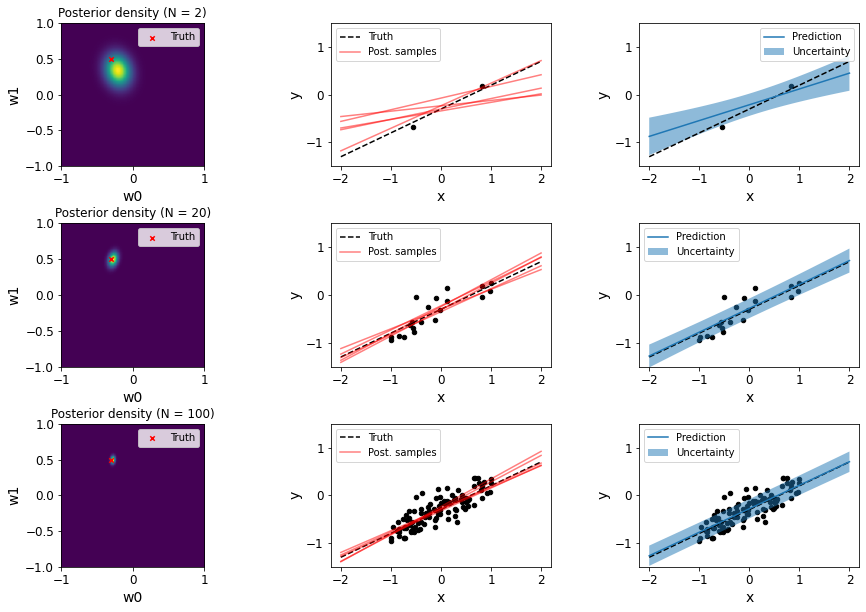

In [18]:
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

# Training dataset sizes
N_list = [2, 20, 100]

beta = 25.0
alpha = 20.0

# Training observations in [-1, 1)
X = np.random.rand(N_list[-1], 1) * 2 - 1

# Training target values
t = f(X, noise_variance=1/beta)

# Test observations
X_test = np.linspace(-2, 2, 100).reshape(-1, 1)

# Function values without noise 
y_true_mean = f(X_test, noise_variance=0)
    
# Design matrix of test observations
Phi_test = expand(X_test, identity_basis_function)

#plt.scatter(X, t)

plt.figure(figsize=(15, 10))
plt.subplots_adjust(hspace=0.4, wspace=0.4)


for i, N in enumerate(N_list):
    X_N = X[:N]
    t_N = t[:N]

    # Design matrix of training observations
    Phi_N = expand(X_N, identity_basis_function)

    # Mean and covariance matrix of posterior
    m_N, S_N = posterior(Phi_N, t_N, alpha, beta)
    #print("m_N shape:",m_N.shape)
    #print("S_N shape:",S_N.shape)  
    
    # Mean and variances of posterior predictive 
    y, y_var = posterior_predictive(Phi_test, m_N, S_N, beta)
    
    # Draw 5 random weight samples from posterior and compute y values
    w_samples = np.random.multivariate_normal(m_N.ravel(), S_N, 5).T
    y_samples = Phi_test.dot(w_samples)

    plt.subplot(len(N_list), 3, i * 3 + 1)
    plot_posterior(m_N, S_N, f_w0, f_w1)
    plt.title(f'Posterior density (N = {N})')
    plt.legend()

    plt.subplot(len(N_list), 3, i * 3 + 2)
    plot_data(X_N, t_N)
    plot_truth(X_test, y_true_mean)
    plot_posterior_samples(X_test, y_samples)
    plt.ylim(-1.5, 1.5)
    plt.legend()

    plt.subplot(len(N_list), 3, i * 3 + 3)
    plot_data(X_N, t_N)
    plot_truth(X_test, y_true_mean, label=None)
    plot_predictive(X_test, y, np.sqrt(y_var))
    plt.ylim(-1.5, 1.5)
    plt.legend()

 




In the first column we plot the posterior density for the two weight parameters. We see that as the number of training data points increases, the posterior becomes more and more peaked around the most probable value for the weights. In the second column we sample a few weight values from the posterior distribution and plot the corresponding prediction $y = \mathbf{w}^T \mathbf{x}$. In the last column we show the final predictive distribution by giving the mean and the variance at each point $x$. Note that although this special case allowed us to calculate the predictive distribution analytically, this is really the result of an integration over all possible values of the weights weighted by the posterior distribution. This is equivalent to averaging predictions from an ensemble of all possible models weighted by the posterior probabilities of their parameters $\mathbf{w}$.

We see that when $N = 2$ there is a lot of uncertainty on what values the weights should take on. This is reflected in the posterior distribution being more spread out (meanining that it's assigning a similar probability to several different parameter values) and in the predictions being very different for different sampled weights, which results in a higher variance in the third column. 

We can note:
*   The epistemic uncertainty decreases as we increase the number of observations 
*   The uncertainty is greater in regions of space with less data points

 

### Sinusoidal dataset fitting
Now let's try to fit a sinusoidal data generating function. We'll compare both MLE and Bayesian predictions. In particular, we'll use a polynomial of degree 200 to fit the sinusoidal function in order to see how the two methods perform when the chosen model complexity greatly exceeds the true complexity of the underlying model. 

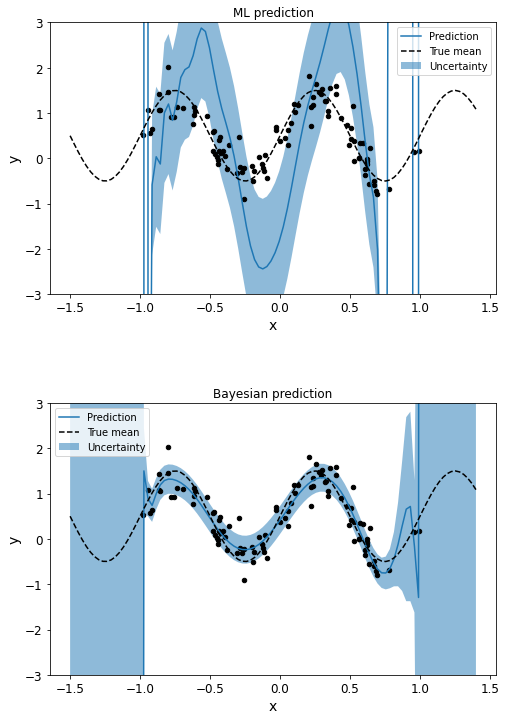

In [17]:
### Your code here ###

# Training observations in [-1, 1)
X = np.random.rand(N_list[-1], 1) * 2 - 1

# training target values
#hyperparams need to be optimized for the given model (polynomial)
beta = 1 / (0.3 ** 2) 
alpha = 0.005

t = g(X, noise_variance=1/beta)

# design matrix of train observations
poly_deg = 200
Phi = expand(X, polynomial_basis_function,bf_args=range(1,poly_deg)) 


### Testing ###
# test observations
X_test = np.linspace(-1.5, 1.4, 100).reshape(-1, 1)

# function values without noise 
y_true_mean = g(X_test, noise_variance=0)
    
# design matrix of test observations
Phi_test = expand(X_test, polynomial_basis_function,bf_args=range(1,poly_deg))
#Phi_test = expand(X_test, gaussian_basis_function,bf_args=np.linspace(0, 1, 9))

# MLE
w_ml = solve_normal_equation(Phi,t)
var_ml = solve_variance_ml(Phi, t, w_ml)
y_ml = predict_y_ml(Phi_test, w_ml)

# Mean and covariance matrix of posterior
m_N, S_N = posterior(Phi, t, alpha, beta)
    
# Mean and variances of posterior predictive 
y, y_var = posterior_predictive(Phi_test, m_N, S_N, beta)
    

# plot predictive distribution 

plt.figure(figsize=(8, 12))
plt.subplots_adjust(hspace=0.4)
plt.subplot(2,1,1)
plt.title('ML prediction')
plot_predictive(X_test,y_ml,np.sqrt(var_ml))
plot_data(X,t) #training data
plot_true_mean(X_test, y_true_mean) #true mean
plt.ylim(-3,3)
plt.legend()

plt.subplot(2,1,2)
plt.title('Bayesian prediction')
plot_predictive(X_test,y,np.sqrt(y_var))
plot_data(X,t) #training data
plot_true_mean(X_test, y_true_mean) #true mean
plt.ylim(-3,3)
plt.legend()


Note how the Bayesian prediction is not affected by overfitting, even when the complexity of the model used is much higher than the one of the true distribution. This is again the result of the predictive distribution beeing a weighted average of several different models parametrized by different sampled weights. Note also how the Bayesian prediction reports a very high uncertainty in regions unseen during training.

# Conclusion 

In this notebook we compared the two main approaches to statistical inference: the frequentist and the Bayesian approach. We saw that the MLE used in frequentist inference performs well and is efficient when the training data set is sufficiently large, but it can severely overfit when the training set is too small or when the model complexity exceeds the complexity of the distribution we're trying to fit. Moreover, the way the uncertainty is quantified takes into account only the aleatoric uncertainty due to the noise in the data generating process, but it does not address the epistemic uncertainty due to lack of training data. This causes it to underestimate the overall uncertainty, particularly in regions of unseen phasespace. In contrast, we saw how a Bayesian approach naturally incorporates the epistemic uncertainty about the model parameters by means of a prior and the use of basic laws of probability theory. The presence of the prior acts as a regularizer and prevents overfitting, and we saw how a Bayesian prior is in fact already implicitly used in standard machine learning techniques. In addition, the prediction being a distribution of possible model predictions, rather than a single best performing model, makes Bayesian learning a form of an ensemble learning, which is better-performing and gives a better idea of the uncertainty associated with the underlying process. 

# Final remark
As the number of parameters in modern machine learning models is becoming increasingly large, more and more training data is needed to compensate the increase in model complexity and prevent overfitting in classical machine learning. Moreover, the inability of frequentist inference to answer "I don't know" can be very problematic in applications where silent failures can lead to dramatic outcomes (i.e. medical diagnostics, self-driving cars, etc.) I hope this notebook was successfull in demonstrating how Bayesian machine learning can be a solution there where the amount of training data needed has become prohibitevely large or the context of application does not allow for false positives. 

Author: Maria Mazza

This notebook follows http://krasserm.github.io/2019/02/23/bayesian-linear-regression/ 

The theory part follows Bishop's *Pattern recognition and machine learning*.